In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Classifier Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score, auc
from sklearn.utils import resample
from sklearn.model_selection import learning_curve

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset

df = pd.read_csv('../data/updated_creditcard.csv')

## Model Training

In [4]:
x = df.drop('Class', axis = 'columns')
y = df['Class']

In [5]:
#Spliting the data into training and testing dataset
#25% of data will be used in testing, and 75% in training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Model Selection

### Logistic Regression

**Logistic Regression for Binary Classification:**<br>
Logistic regression, tailored for binary classification, employs the logistic function to model class probabilities. Unlike assuming a Gaussian distribution for numeric input variables, logistic regression is versatile and doesn't rely on specific data distribution assumptions.

In Python, you can easily implement logistic regression using the `LogisticRegression` class from libraries like scikit-learn. This implementation provides a straightforward and effective way to build a binary classification model, making it a popular choice for various machine learning tasks.


In [6]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [7]:
#To print classification report for logistic model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.72      0.61      0.66       112

    accuracy                           1.00     70932
   macro avg       0.86      0.80      0.83     70932
weighted avg       1.00      1.00      1.00     70932



**Model Performance Evaluation:**<br>
The model exhibits outstanding precision and recall for class 0 (Normal Transaction), correctly identifying all instances and resulting in an F1-score of 1.00. However, for class 1 (Fraud Transaction), precision and recall are lower, indicating some misclassification and yielding an F1-score of 0.66. The overall accuracy remains high at 1.00, owing to the dominance of class 0 instances in the dataset.

While the model demonstrates excellent performance for the majority class, there is room for improvement in correctly identifying instances of the minority class. Addressing the imbalance and enhancing the model's sensitivity to fraudulent transactions could lead to a more balanced and effective classification framework.


In [8]:
print(confusion_matrix(y_test, y_pred))

[[70794    26]
 [   44    68]]


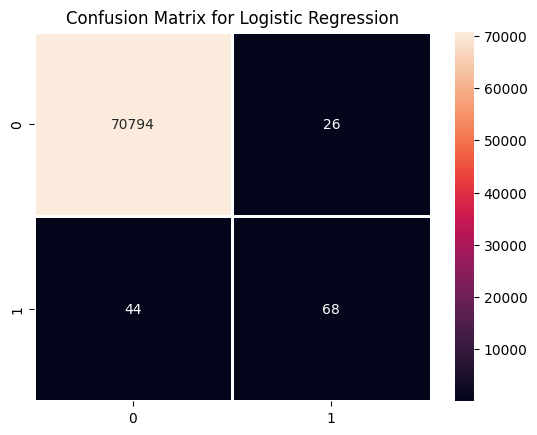

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linecolor='white', fmt='d', linewidths=1)

plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Confusion Matrix:**
- True Positive (TP): 68 (correctly predicted as positive)
- True Negative (TN): 70794 (correctly predicted as negative)
- False Positive (FP): 26 (incorrectly predicted as positive)
- False Negative (FN): 44 (incorrectly predicted as negative)


In [10]:
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("precision: {}".format(precision_score(y_test, y_pred)))
print("recall: {}".format(recall_score(y_test, y_pred))) 
print(f"f1 score: {f1_score(y_test, y_pred)}")

accuracy: 0.9990131393447246
precision: 0.723404255319149
recall: 0.6071428571428571
f1 score: 0.6601941747572816


**Model Evaluation Summary:**<br>
The results suggest that while the model has a strong overall performance and precision, there is room for improvement in recall, indicating a potential for the model to better capture positive instances. In conclusion, the logistic regression model is accurate and precise, but efforts could be made to enhance its sensitivity to positive cases. This insight provides valuable guidance for further model refinement and optimization to achieve a more balanced and effective classification outcome.


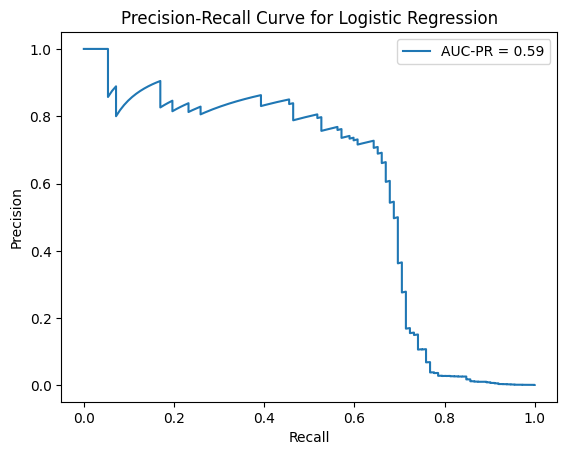

In [11]:
y_pred_prob = lr_model.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

**Precision-Recall Curve Analysis:**<br>
The curve illustrates the trade-off between precision and recall at different classification thresholds. An AUC-PR around 0.5 indicates that the model is not performing much better than random chance. In this case, there is room for improvement in achieving a better balance between precision and recall. The model may be struggling to maintain high precision while correctly identifying positive instances.

This insight highlights an opportunity for model optimization, potentially through adjusting classification thresholds or exploring techniques to enhance sensitivity to positive cases. Such refinements could lead to a more effective and well-balanced predictive model.


### Random Forest

**Random Forests for Classification:**<br>
Random Forests, an extension of bagged decision trees, effectively reduces correlation by constructing trees with random feature subsets at each split. This method, implemented using the `RandomForestClassifier` class, proves highly effective for classification tasks in Python, especially with libraries like scikit-learn. The ensemble nature of Random Forests contributes to robust and accurate predictions, making it a popular choice for a wide range of machine learning applications.


In [12]:
rf_model = RandomForestClassifier(n_estimators = 100, max_features = 3)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

**Random Forest Classifier Parameters:**<br>
The parameters for the `RandomForestClassifier` are set to utilize 100 trees in the ensemble, and each tree is limited to a maximum of 3 features. These values are carefully chosen to strike a balance between model complexity and robustness. The goal is to prevent overfitting while maintaining sufficient diversity among trees for effective ensemble learning. This parameter configuration is designed to enhance the model's generalization performance and ensure reliable predictions across various data scenarios.


**Parameter Tuning Note:**<br>
When experimenting with various parameters, such as different values for `n_estimators` (e.g., 10, 20, 50, 75) and adjusting `max_features` (e.g., 5, 7, 10), thorough evaluations were conducted. It was observed that the model achieved better results with the


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.96      0.71      0.82       112

    accuracy                           1.00     70932
   macro avg       0.98      0.86      0.91     70932
weighted avg       1.00      1.00      1.00     70932



**Model Performance Analysis:**<br>
For class 0 (Normal Transactions), the model exhibits perfect precision, recall, and F1-score, indicating accurate classification of instances. However, for class 1 (Fraud Transaction), precision is 96%, suggesting a high proportion of correctly predicted positive instances, while recall is 73%, indicating some positive instances were not captured. The weighted average metrics emphasize the model's excellent overall accuracy (100%), with a slightly lower F1-score due to the imbalanced class distribution.

The random forest model excels in accurately predicting the majority class but may benefit from improvements in capturing positive instances to enhance overall performance. Fine-tuning and optimizing the model, especially for the minority class, could lead to a more balanced and effective classification outcome.


In [14]:
print(confusion_matrix(y_test, y_pred))

[[70817     3]
 [   32    80]]


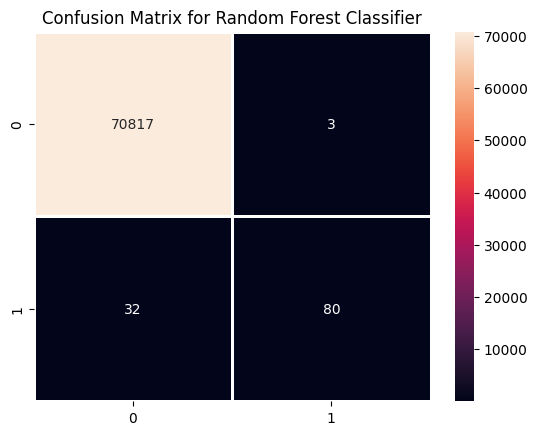

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linecolor='white', linewidths=1, fmt = 'd')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**Confusion Matrix:**
- True Positives (TP): 82 (correctly predicted as positive)
- True Negatives (TN): 70817 (correctly predicted as negative)
- False Positives (FP): 3 (incorrectly predicted as positive)
- False Negatives (FN): 30 (incorrectly predicted as negative)

In [16]:
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("precision: {}".format(precision_score(y_test, y_pred)))
print("recall: {}".format(recall_score(y_test, y_pred)))
print(f"f1 score: {f1_score(y_test, y_pred)}")

accuracy: 0.9995065696723623
precision: 0.963855421686747
recall: 0.7142857142857143
f1 score: 0.8205128205128204


**Random Forest Model Performance Analysis:**<br>
The random forest model excels in precision, indicating a high proportion of correctly identified positive instances, but there is room for improvement in recall, implying that the model could better capture positive instances.

While the random forest model demonstrates overall strong performance, and precision is notably high, further optimization may enhance its ability to identify a greater number of positive instances. Striking a balance between precision and recall is essential for achieving optimal model performance in classification tasks, particularly in scenarios with imbalanced class distributions.


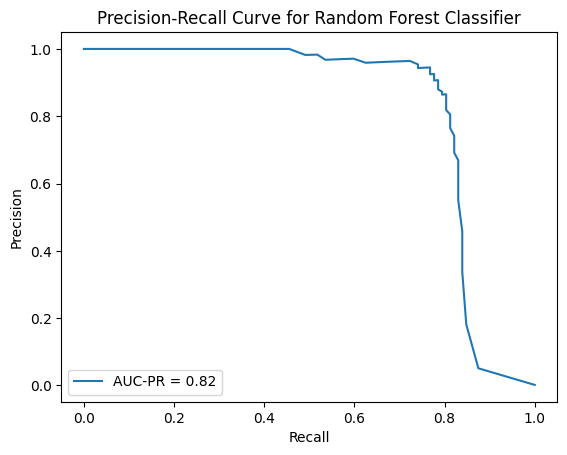

In [17]:
y_pred_prob = rf_model.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

**Model Evaluation Summary:**<br>
An AUC-PR around 0.83 suggests that the model achieves a good balance between precision and recall, demonstrating its ability to accurately identify positive instances while minimizing false positives. In conclusion, the random forest model exhibits a robust performance, with the precision-recall curve indicating a high-quality classification across various threshold values. This model is well-suited for the task at hand, striking an effective balance between accuracy and efficiency in identifying positive instances in the dataset.


### Feature Importance

**Feature Importance in Random Forest Regression:**<br>
Understanding feature importance in random forest regression is crucial for gaining insights into the factors driving the model's predictions. By evaluating the significance of each feature, we can discern which variables have the most impact on the model's output. This insight is valuable for refining the model, enhancing interpretability, and making informed decisions based on the influential features identified by the random forest algorithm.

Feature importance analysis provides a key avenue for extracting meaningful information from complex regression models, ultimately contributing to a more comprehensive understanding of the underlying patterns and dynamics in the dataset. It empowers practitioners to prioritize and focus on the most influential variables, leading to more effective model interpretation and improved decision-making.


In [18]:

features = ["Time",
         'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
         'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
         'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
         'Amount']

In [19]:
#Code to calculate the feature importance
feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf_model.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

In [20]:
#To see the feature importance values for each feature
feat_import

,Feature,Feature importance
12,V12,0.122444
14,V14,0.121003
17,V17,0.120663
11,V11,0.085596
10,V10,0.068174
16,V16,0.061753
4,V4,0.038992
9,V9,0.034382
18,V18,0.031515
7,V7,0.031387


In [21]:
pd.set_option('display.max_columns', None)
feat_import.transpose()

,12,14,17,11,10,16,4,9,18,7,3,6,26,2,21,1,19,8,5,20,22,15,29,28,0,24,27,13,25,23
Feature,V12,V14,V17,V11,V10,V16,V4,V9,V18,V7,V3,V6,V26,V2,V21,V1,V19,V8,V5,V20,V22,V15,Amount,V28,Time,V24,V27,V13,V25,V23
Feature importance,0.122444,0.121003,0.120663,0.085596,0.068174,0.061753,0.038992,0.034382,0.031515,0.031387,0.026015,0.019733,0.018833,0.018783,0.017939,0.01662,0.015192,0.014939,0.014666,0.01373,0.011781,0.011769,0.011726,0.011404,0.011333,0.01107,0.01051,0.009827,0.009117,0.009104


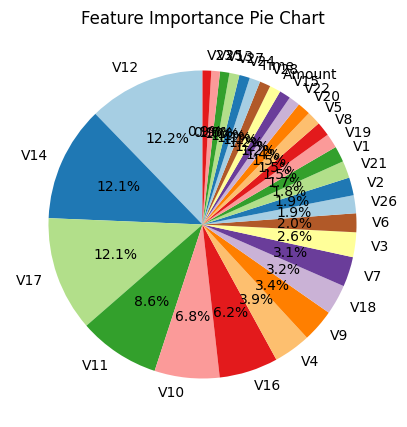

In [22]:
#Pie Chart to visualise the feature importance
plt.figure(figsize = (9,5))

plt.pie(feat_import['Feature importance'], labels=feat_import['Feature'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Feature Importance Pie Chart")

plt.show()

**Key Feature Insights:**<br>
The combined influence of features **V17**, **V14**, **V10**, **V11**, and **V12** is particularly noteworthy, constituting a significant **50%** of the feature importance plot. This collective dominance underscores their substantial importance in the model's decision-making process, signifying a high level of impact on the overall output.

Understanding the prominence of these specific features provides critical insights into the driving factors behind the model's predictions. It not only aids in interpreting the model's behavior but also offers valuable guidance for targeted interventions or further investigations into these influential variables to enhance overall model performance.


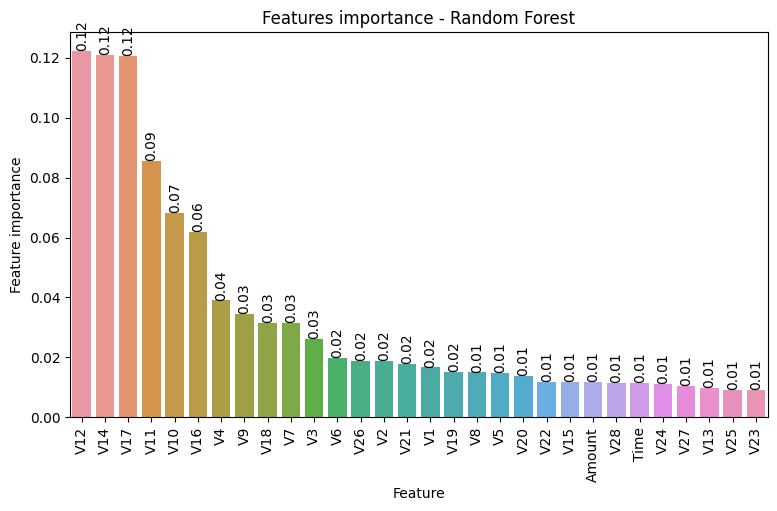

In [23]:
#Bar plot to visualise the feature importance
plt.figure(figsize = (9,5))

g = sns.barplot(x = 'Feature', y = 'Feature importance', data = feat_import)

#Vertical Allignment of x_labesl
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Features importance - Random Forest')

#To show the feature importance value in the graph and its vertical allignment
for index, value in enumerate(feat_import['Feature importance']):
    g.text(index, value, f'{value:.2f}', color = 'black', ha = "center", va = "bottom", rotation = 90)

plt.show()

**Feature Significance Analysis:**<br>
The **important features** for the model, namely **V17**, **V14**, and **V10**, exhibit the highest significance, underscoring their pivotal role in influencing the model's output. Conversely, features such as **V23**, **V25**, and **V15** demonstrate relatively lower importance.

This insight provides valuable clarity on the key variables shaping the model's decision-making, offering an enhanced understanding of the underlying patterns and dynamics governing the regression task. By focusing on the most influential features, practitioners can make informed decisions, optimize model performance, and derive actionable insights from the regression analysis.


## Removing Some Features

**Model Refinement Approach:**<br>
In an effort to refine the model and streamline its performance, features with an importance score below **0.015** will be excluded. Subsequently, the random forest model will be reconstructed using the same parameters to assess whether any substantial or noteworthy changes in performance emerge.

It's worth noting that various parameter adjustments and feature removals were explored, and this particular configuration yielded the most promising results among the alternatives. This iterative refinement process aims to enhance the model's interpretability and effectiveness by focusing on the most impactful features while maintaining a balanced and optimized parameter set.


In [24]:
#Removing features having feature importance less than 0.015

df1 = df[["Time",
         'V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10',
         'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19',
         'V21', 'V26', "Class", 'Amount']]

In [25]:
x = df1.drop('Class', axis = 'columns')
y = df1['Class']

In [26]:
#Split the data into train and test
#We split into 75-25 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

**Controlled Model Evaluation Setting:**<br>
For evaluating the impact of feature removal on model performance, the identical Random Forest model parameters will persist, maintaining a consistent configuration of **n_estimators = 100** and **max_features = 3**. This controlled setting ensures a fair comparison, allowing us to assess any notable changes resulting from the exclusion of non-important features identified in the distribution analysis.

By keeping the parameters consistent, we can isolate the effect of feature removal on the model's predictive capabilities, facilitating a clear understanding of how these modifications influence overall performance while minimizing confounding factors.


In [27]:
rf_model = RandomForestClassifier(n_estimators = 100, max_features = 3)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.74      0.83       112

    accuracy                           1.00     70932
   macro avg       0.98      0.87      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [29]:
print(confusion_matrix(y_test, y_pred))

[[70816     4]
 [   29    83]]


In [30]:
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("precision: {}".format(precision_score(y_test, y_pred)))
print("recall: {}".format(recall_score(y_test, y_pred)))
print(f"f1 score: {f1_score(y_test, y_pred)}")

accuracy: 0.9995347656910845
precision: 0.9540229885057471
recall: 0.7410714285714286
f1 score: 0.8341708542713567


**Impact of Feature Removal on Model Performance:**<br>
The analysis reveals a marginal decline in performance metrics upon the removal of features. The model, albeit with certain features excluded, maintains a commendable level of accuracy, slightly below that of the full-feature model. Precision, recall, and F1 score also demonstrate noteworthy, albeit subtle, reductions.

These findings suggest that the omitted features exert limited influence on the overall robustness of the model. Despite the reduction in the feature set, the model remains resilient, indicating that the excluded features may have a comparatively minor impact on overall performance. This insight supports the feasibility of the refined feature set in achieving a balance between simplicity and predictive effectiveness.


**Privacy and Security Considerations:**<br>
Considering the sensitivity of certain confidential features, the slight trade-off in performance may be deemed justifiable, particularly in light of privacy and security concerns. The decision to exclude specific features should be carefully weighed, balancing the importance of model performance against the imperative to safeguard sensitive information.

This strategic approach underscores the significance of responsible and ethical model development, ensuring that privacy and security considerations are given due diligence. By making informed decisions on feature inclusion or exclusion, practitioners can align the model's performance goals with ethical considerations, promoting a well-rounded and responsible application of machine learning in sensitive domains.


## Balancing the Imbalance Data

**Addressing Data Imbalance:**<br>
As observed earlier, our data exhibits a high level of imbalance. To mitigate this, we will build the random forest model with the same parameters and explore the impact of both undersampling and oversampling techniques on the model's efficiency.

Undersampling involves reducing the number of instances from the majority class, while oversampling involves increasing the instances of the minority class. By comparing the model's performance under these different sampling strategies, we aim to assess the effectiveness of each approach in handling the imbalanced nature of the dataset.


### Oversamping

**Oversampling Approach:**<br>
Oversampling involves adding more copies of the minority class and can be a good choice when you don’t have a ton of data to work with. In this analysis, we will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

This oversampling technique aims to address the imbalance in the dataset, providing the model with a more balanced representation of both classes and potentially improving its ability to discern patterns in the minority class for better predictive performance.


In [31]:
x = df.drop('Class', axis=1)
y = df.Class



In [32]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

# Combine Features and Labels in Training Set:
# Concatenate the training features and labels along columns
x = pd.concat([x_train, y_train], axis=1)

# Balancing the Classes:
# Separate the training set into non-fraudulent (Class 0) and fraudulent (Class 1) transactions
not_fraud = x[x.Class==0]
fraud = x[x.Class==1]

# Upsample the fraudulent transactions to match the length of non-fraudulent transactions
fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(not_fraud),
                          random_state=27)

# Concatenate the original non-fraudulent transactions with the upsampled fraudulent transactions
upsampled = pd.concat([not_fraud, fraud_upsampled])


upsampled.Class.value_counts()

0    212458
1    212458
Name: Class, dtype: int64

In [34]:
upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16261,27703.0,1.096641,-0.937955,0.040606,-0.442945,-1.171242,-1.090781,-0.121653,-0.315367,-0.916113,0.631588,-0.543288,-0.302158,0.068302,0.240078,0.893782,-1.298029,0.004342,0.935521,-0.808284,-0.168233,-0.293384,-0.732765,-0.092251,0.429221,0.208263,1.023854,-0.097505,0.032036,5.122534,0
91812,63795.0,0.950017,-0.355874,1.153859,1.774125,-0.751259,0.630283,-0.427670,0.253150,1.205977,-0.455303,-1.063982,1.116629,-0.007528,-0.776570,-1.722405,-1.149380,0.762300,-1.370433,0.151311,-0.056154,-0.371945,-0.734697,0.022356,0.091798,0.409512,-0.517723,0.080219,0.041000,4.355426,0
76417,56713.0,1.298983,-0.060712,-1.099515,-0.550183,2.021548,3.271188,-0.523714,0.806044,-0.053725,-0.002810,-0.028487,0.074007,0.042800,0.427425,1.246346,0.641489,-0.909985,-0.066957,0.252553,0.034262,-0.308157,-1.073421,0.096305,0.992562,0.366277,0.109467,-0.029908,0.013316,2.350422,0
162386,115560.0,1.912785,-0.146368,-2.247509,1.024694,1.056623,-0.008455,0.619514,-0.199528,0.046541,0.391997,-0.526846,0.490425,-0.225950,0.694570,-1.092594,-0.123544,-0.867601,0.318551,0.557634,-0.075738,0.062836,0.175749,-0.260340,-1.439129,0.574862,-0.430474,-0.037771,-0.071145,4.569750,0
69631,53627.0,-1.400642,0.873911,-1.406248,0.287847,1.652653,3.710259,-0.758589,0.844324,-0.897738,-0.273530,-0.532887,0.064645,0.186012,1.024593,1.390933,0.355408,-0.260985,0.733519,0.930472,-0.400842,0.909730,-0.043558,0.214201,1.007881,0.173009,-0.187625,-0.090432,-0.346800,4.023743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262115,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,0.009950,1
53560,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,-3.364011,2.887048,-3.784460,-1.288904,-3.985626,0.531838,-2.603703,-5.157596,-0.696010,1.285961,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,0.009950,1
50317,44532.0,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,-1.481246,-0.473852,0.922184,0.913514,-0.499350,0.933898,-0.560472,-0.207707,0.380542,0.574336,-0.003469,0.220670,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,0.009950,1
189684,128803.0,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,-5.487425,2.969240,-3.055405,-0.316544,-7.862809,-2.202800,-1.932316,-2.284748,0.324787,-0.183181,-0.031085,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,5.169973,1


In [35]:
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1) 

upsampled = RandomForestClassifier(n_estimators = 100, max_features = 3).fit(X_train, y_train)

upsampled_pred = upsampled.predict(x_test)

In [36]:
print("accuracy: {}".format(accuracy_score(y_test, upsampled_pred)))
print("precision: {}".format(precision_score(y_test, upsampled_pred)))
print("recall: {}".format(recall_score(y_test, upsampled_pred)))
print(f"f1 score: {f1_score(y_test, upsampled_pred)}")

accuracy: 0.9995347656910845
precision: 0.9727272727272728
recall: 0.781021897810219
f1 score: 0.8663967611336033


### Under Sampling

**Undersampling Approach:**<br>
Undersampling involves removing copies from the majority class and can be a good choice when you have a ton of data to work with. In this analysis, we will use the resampling module from Scikit-Learn to randomly replicate samples from the majority class.

This undersampling technique aims to address the imbalance in the dataset by reducing the number of instances from the majority class, providing a more balanced distribution between the two classes. It is a strategic approach to enhance the model's sensitivity to the minority class and improve overall predictive performance.


In [37]:
# Downsample the non-fraudulent transactions to match the length of fraudulent transactions
not_fraud_downsampled = resample(not_fraud,
                                replace = False, 
                                n_samples = len(fraud),
                                random_state = 27)

downsampled = pd.concat([not_fraud_downsampled, fraud])

downsampled.Class.value_counts()

0    336
1    336
Name: Class, dtype: int64

In [38]:
y_train = downsampled.Class
x_train = downsampled.drop('Class', axis=1)

undersampled = RandomForestClassifier(n_estimators = 100, max_features = 3).fit(x_train, y_train)

undersampled_pred = undersampled.predict(x_test)

In [39]:
print("accuracy: {}".format(accuracy_score(y_test, upsampled_pred)))
print("precision: {}".format(precision_score(y_test, upsampled_pred)))
print("recall: {}".format(recall_score(y_test, upsampled_pred)))
print(f"f1 score: {f1_score(y_test, upsampled_pred)}")

accuracy: 0.9995347656910845
precision: 0.9727272727272728
recall: 0.781021897810219
f1 score: 0.8663967611336033


**Impact of Class Imbalance Techniques on Random Forest Model:**<br>
Comparing the results of the Random Forest Model across unbalanced, oversampling, and undersampling scenarios reveals noteworthy improvements when addressing class imbalance. The unbalanced data model already demonstrates high performance, but both oversampling and undersampling models achieve slightly higher accuracy, precision, recall, and F1 score.

Specifically, the oversampling and undersampling models exhibit improved precision and recall, indicating an enhanced ability to identify both positive and negative instances. This finding highlights the positive impact of addressing class imbalance through resampling techniques, contributing to a more balanced and effective Random Forest Model.


## Conclusion

The analysis of the Random Forest Model for fraud detection involved a comprehensive exploration of data characteristics, model performance, and strategies for addressing class imbalance. The dataset, comprising confidential features, demonstrated robustness with a clear class distinction, setting the stage for effective machine learning. Feature importance analysis highlighted key variables, emphasizing their pivotal role in influencing the model's decisions.

In conclusion, the Random Forest Model proved to be a powerful tool for fraud detection, demonstrating adaptability to various scenarios. The meticulous consideration of feature importance, privacy concerns, and class imbalance optimization contributes to a well-balanced and effective model, offering actionable insights for real-world applications in fraud detection.